<a href="https://colab.research.google.com/github/elanghairilanam/Portfolio-Data-Science/blob/main/Data_Cleaning_for_Data_Demografi_dan_Sosial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [31]:
import pandas as pd

df_pendidikan = pd.read_excel("Tingkat Pendidikan.xlsx")
df_usia = pd.read_excel("Usia.xlsx")
df_ketenagakerjaan = pd.read_excel("ketenagakerjaan.xlsx")

# Data Cleaning

In [32]:
# cek missing value

df_usia.isna().sum()

,0
periode_data,0
wilayah,0
kecamatan,0
kelompok_umur,0
laki_laki,0
perempuan,0
jumlah_penduduk,0
rasio_jenis_kelamin,0


In [33]:
df_pendidikan.isna().sum()

,0
periode_data,0
tahun,0
nama_provinsi,0
nama_kabupaten_kota,0
nama_kecamatan,0
nama_kelaurahan,0
pendidikan,0
jenis_kelamin,2670
jumlah_penduduk,14


In [34]:
df_ketenagakerjaan.isna().sum()

,0
periode_data,0
keadaan_ketenagakerjaan,0
jumlah,0


In [35]:
#Handling missing value

#Ditemukan bahwa di kolom jenis kelamin terdapat 2670 missing value

#Karena jumlah missing value pada kolom jenis kelamin 20% terhadap data keseluruhan maka saya memutuskan untuk mengkategorikan nya menjadi "Tidak Diketahui"

df_pendidikan["jenis_kelamin"].fillna("Tidak Diketahui", inplace=True)

/tmp/ipython-input-4242100520.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pendidikan["jenis_kelamin"].fillna("Tidak Diketahui", inplace=True)


In [36]:
# kita cek lagi missing value nya
df_pendidikan.isna().sum()

,0
periode_data,0
tahun,0
nama_provinsi,0
nama_kabupaten_kota,0
nama_kecamatan,0
nama_kelaurahan,0
pendidikan,0
jenis_kelamin,0
jumlah_penduduk,14


In [37]:
# masih ada 14 missing value dan saya memutuskan untuk mengisi nya dengan rata2 jumlah penduduk berdasarkan kecamatan nya

In [38]:
#kita lihat type data dari df_pendidikan
df_pendidikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13340 entries, 0 to 13339
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   periode_data         13340 non-null  int64 
 1   tahun                13340 non-null  int64 
 2   nama_provinsi        13340 non-null  object
 3   nama_kabupaten_kota  13340 non-null  object
 4   nama_kecamatan       13340 non-null  object
 5   nama_kelaurahan      13340 non-null  object
 6   pendidikan           13340 non-null  object
 7   jenis_kelamin        13340 non-null  object
 8   jumlah_penduduk      13326 non-null  object
dtypes: int64(2), object(7)
memory usage: 938.1+ KB


In [39]:
# Convert 'jumlah_penduduk' mejadi numeric
df_pendidikan['jumlah_penduduk'] = pd.to_numeric(df_pendidikan['jumlah_penduduk'], errors='coerce')

# isi nilai NaN menjadi 0
df_pendidikan['jumlah_penduduk'] = df_pendidikan['jumlah_penduduk'].fillna(0)

# Convert 'jumlah_penduduk' mejadi integer
df_pendidikan['jumlah_penduduk'] = df_pendidikan['jumlah_penduduk'].astype(int)

df_pendidikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13340 entries, 0 to 13339
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   periode_data         13340 non-null  int64 
 1   tahun                13340 non-null  int64 
 2   nama_provinsi        13340 non-null  object
 3   nama_kabupaten_kota  13340 non-null  object
 4   nama_kecamatan       13340 non-null  object
 5   nama_kelaurahan      13340 non-null  object
 6   pendidikan           13340 non-null  object
 7   jenis_kelamin        13340 non-null  object
 8   jumlah_penduduk      13340 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 938.1+ KB


None

In [40]:
#ubah data jumlah_penduduk yang nilai nya 0 dengan rata2 jumlah_penduduk berdasarkan nama_kecamatan
df_pendidikan['jumlah_penduduk'] = df_pendidikan.groupby('nama_kecamatan')['jumlah_penduduk'].transform(lambda x: x.replace(0, x.mean()))

In [42]:
df_pendidikan.isna().sum()

,0
periode_data,0
tahun,0
nama_provinsi,0
nama_kabupaten_kota,0
nama_kecamatan,0
nama_kelaurahan,0
pendidikan,0
jenis_kelamin,0
jumlah_penduduk,0


Melihat Outlier

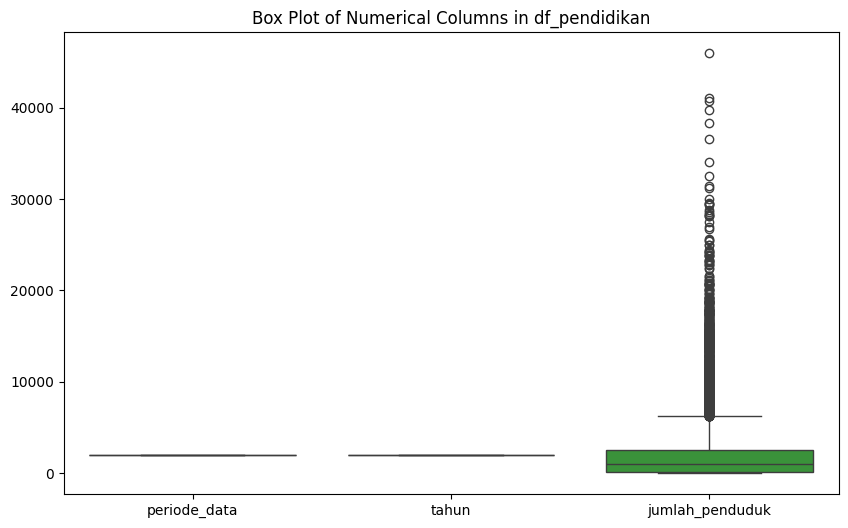

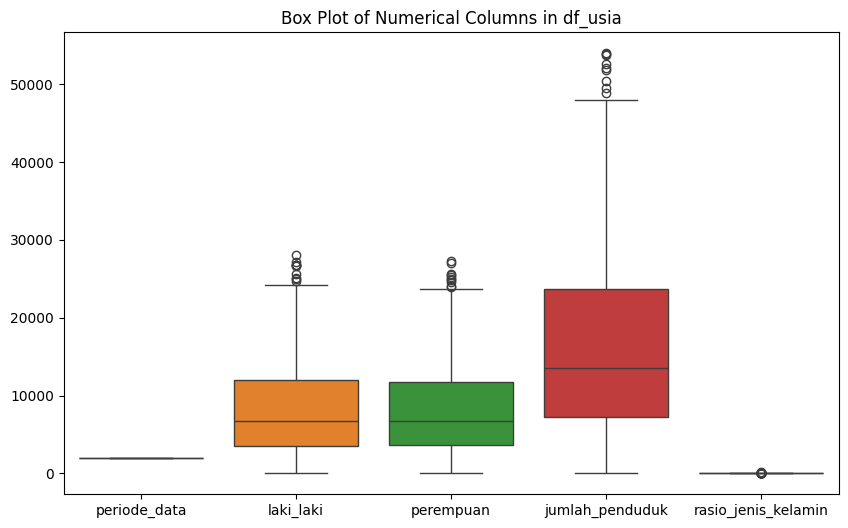

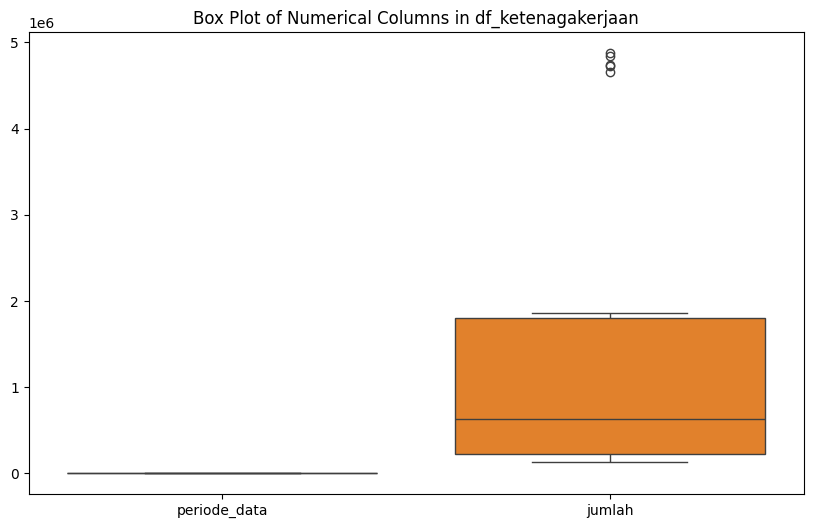

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize outliers in df_pendidikan (numerical columns)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_pendidikan.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plot of Numerical Columns in df_pendidikan')
plt.show()

# Visualize outliers in df_usia (numerical columns)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_usia.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plot of Numerical Columns in df_usia')
plt.show()

# Visualize outliers in df_ketenagakerjaan (numerical columns)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_ketenagakerjaan.select_dtypes(include=['int64', 'float64']))
plt.title('Box Plot of Numerical Columns in df_ketenagakerjaan')
plt.show()

In [ ]:
# Karena tujuan dari analisis ini adalah ingin tahu distribusi penduduk maka akan saya biarkan data Outlier

In [44]:
# Export df_pendidikan to a CSV file
df_pendidikan.to_csv('df_pendidikan.csv', index=False)

# Export df_usia to a CSV file
df_usia.to_csv('df_usia.csv', index=False)

# Export df_ketenagakerjaan to a CSV file
df_ketenagakerjaan.to_csv('df_ketenagakerjaan.csv', index=False)

print("Dataframes exported successfully!")

Dataframes exported successfully!
